- 在前面讲过使用webpack打包项目，使用webpack构建项目，实际是一个自动化过程，启动服务器，在程序运行时，自动完成HTTP服务器，并在服务过程实现自动webpack打包，构建项目的过程，就是描述清楚打包的处理过程。

# 环境安装

- 安装webpack核心模块
    - 模块抢单：
        - `webpack`
        - `webpack-cli`
        - `webpack-dev-server`
    - 安装指令：
        - `sudo npm install webpack webpack-cli webpack-dev-server -g --unsafe-perm`
        - 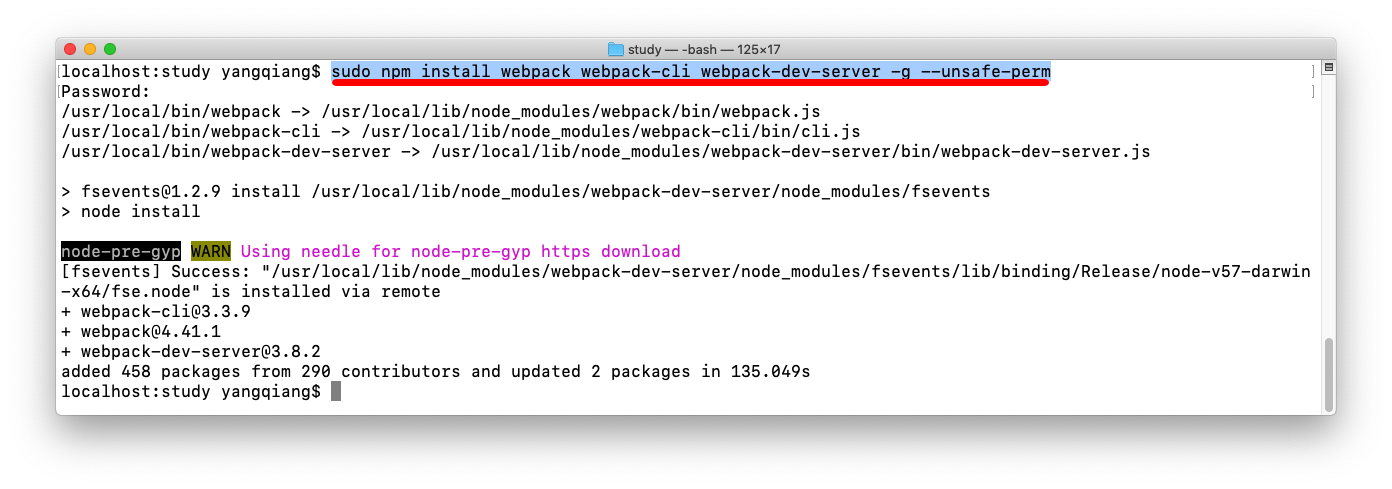

# 构建Web项目工程结构

## 创建项目结构

- 项目结构怎么创建都行，配置的时候指定正确就行，但是一般我们会这么建项目结构：
    - 创建清单：
        - webpackserver-demo
            - src目录：存放项目的源代码文件；
            - dist目录：存放webpack打包后的文件；
            - config目录：存放webpack的配置文件（自动工作的配置文件）
    - 创建指令：
        - `mkdir webpackserver-demo`
            - 创建工程根目录；
        - `cd webpackserver-demo`
            - 切换当前操作的目录为工程目录
        - `mkdir  src dist config`
        - 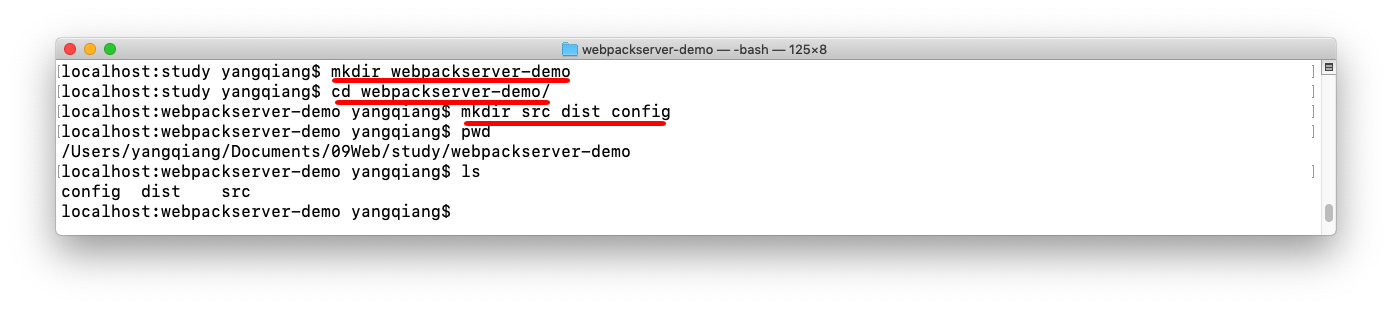
        

## 创建npm配置文件与运行环境

- 使用npm init初始化（如果不想按回车，全部采用默认设置，则可以使用-y选项，表示全部选择都是yes）
    - `npm init -y`
    - 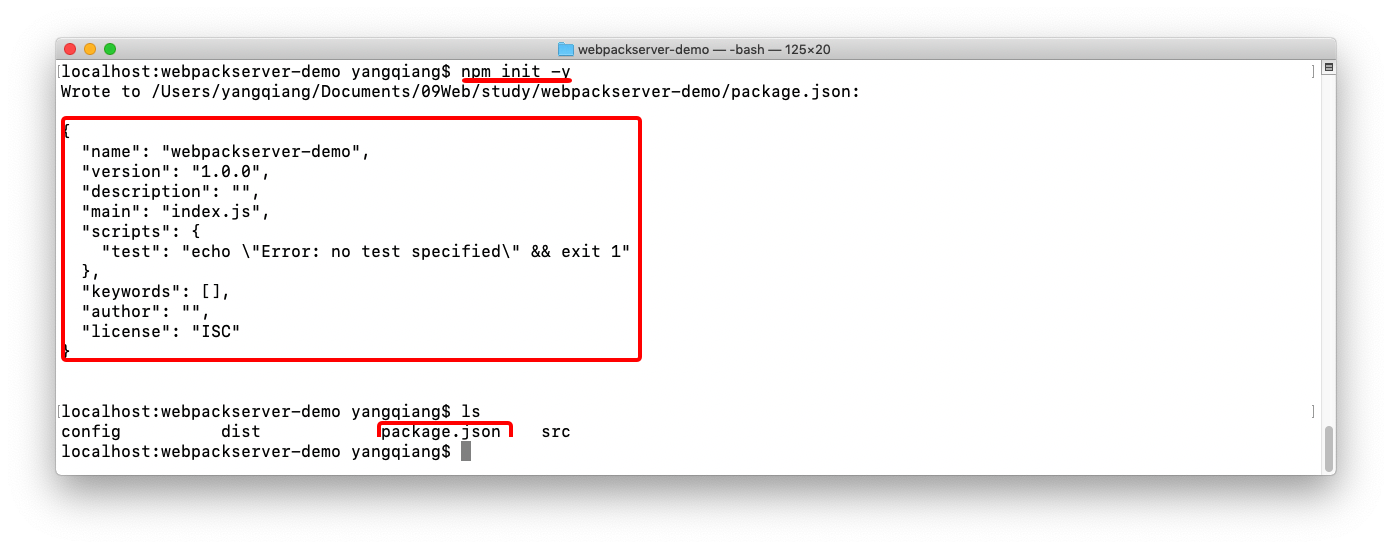

- 通过npm的package.json，可以直接使用npm执行webpack指令。

## 创建需要配置的Web资源

- 需要打包的资源都是都在浏览器执行，所以这两个资源文件，不要包含服务器逻辑（服务器脚本是不需要打包的，因为在node环境下，都可以执行）。

1. 创建包含处理逻辑的js文件（入口文件）
    - 文件名：index.js

```javascript
    document.write("<div style='width:100px; height:100px; background-color:red;'>打包脚本输出</div>");
```

2. 创建使用js的html文件（引用入口js文件）
    - 文件名：index.html

```html
    <!DOCTYPE html>
    <html>
        <head>
            <title>
                Webpack后的js调用
            </title>
            <meta charset="utf-8">
            <link rel="shortcut icon" href="#" />
        </head>
        <body>
            <!--因为js脚本包含支持node的require语法，所以下面的直接调用是存在问题的-->
            <script src="./index.js"></script>
        </body>
    </html>

```

- 注意：
    - html中引用的index.js脚本不是上面的index.js脚本，而是wenpack打包后的js脚本文件，这个文件名可以随意命名，只要明白关系即可。

## 配置框架

1. 文件格式
    - webpack的配置文件采用的是js脚本；
    - 文件名可以随意命名，推荐命名：`webpack.dev.conf.js`

2. 核心基本配置
    - entry：因为webpack会自己处理js中的依赖关系，从入口js文件，会打包所有相关的js文件，在前端页面中，只需要引入一个打包好的静态js文件即可。
    - output：entry打包后的输出文件（可能多个文件，单也是依赖的，只有一个调用入口，output指定这个输出入口文件）
    - devServer：webpack-dev-server服务器的配置：包括端口，日志、缺省主页，错位重定位等。
    - plugins：用在webpack中的各种插件（比如对HTML模板的处理，CSS的处理加载等）
    - module：配置工具模块
    - mode：两个选项：`development`与`production`

3. 配置格式

```javascript
    module.exports= {
        // 模式：开发development与生产production模式
        mode: 'development',
        // entry入口
        entry: {},
        // entry入口的打包输出文件
        output: {},

        // 需要调用的模块配置
        module: {},

        // 需要使用的插件
        plugins:[],
        // webpack-dev-server Web服务器服务参数配置
        devServer:{}
    }

```

4. entry与output配置
    - 这两个配置一般成对。

```javascript
    const path = require("path");

    module.exports= {
        // 模式：开发development与生产production模式
        mode: 'development',
        // entry入口
        entry: {
            main: './src/index.js'     // 采用的相对路径行项目目录开始
        },
        // entry入口的打包输出文件
        output: {
            path: path.resolve(__dirname, '../dist'),   // 输出路径(避免出错，使用绝对路径)
            filename: 'index.js'    // 输出的文件名
        },

        // 需要调用的模块配置
        module: {},

        // 需要使用的插件
        plugins:[],
        // webpack-dev-server Web服务器服务参数配置
        devServer:{}
    }

```

5. 配置devServer

```javascript
    const path = require("path");

    module.exports= {
        // 模式：开发development与生产production模式
        mode: 'development',
        // entry入口
        entry: {
            main: './src/index.js'       // 采用的相对路径行项目目录开始
        },
        // entry入口的打包输出文件
        output: {
            path: path.resolve(__dirname, '../dist'),   // 输出路径(避免出错，使用绝对路径)
            filename: 'index.js'    // 输出的文件名
        },

        // 需要调用的模块配置
        module: {},

        // 需要使用的插件
        plugins:[],
        // webpack-dev-server Web服务器服务参数配置
        devServer:{
            contentBase: path.resolve(__dirname, '../dist'),   // 指定服务资源路径
            port: 9999,   // 服务端口
        }
    }

```

6. 在npm的package.json中配置webpack打包与服务器启动命令

- 在scripts中添加一个执行指令
    - build
    - start


- 备注：
    - build与start可以自定义名字；

```javascript

    {
      "name": "webpackserver-demo",
      "version": "1.0.0",
      "description": "",
      "main": "index.js",
      "scripts": {
        "build": "webpack --config=config/webpack.dev.conf.js",
        "start": "webpack-dev-server --config=config/webpack.dev.conf.js"
      },
      "keywords": [],
      "author": "",
      "license": "ISC"
    }

```

## 执行

1. 打包
    - 指令：`npm run build`

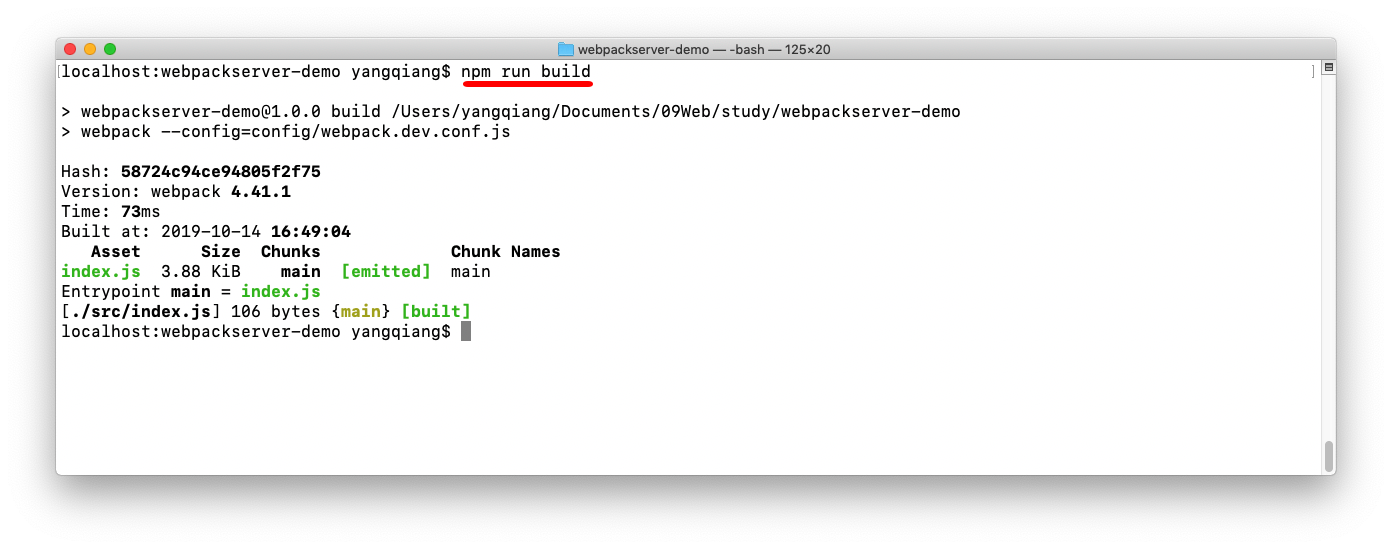

2. 启动服务器
    - 指令：`npm run start`

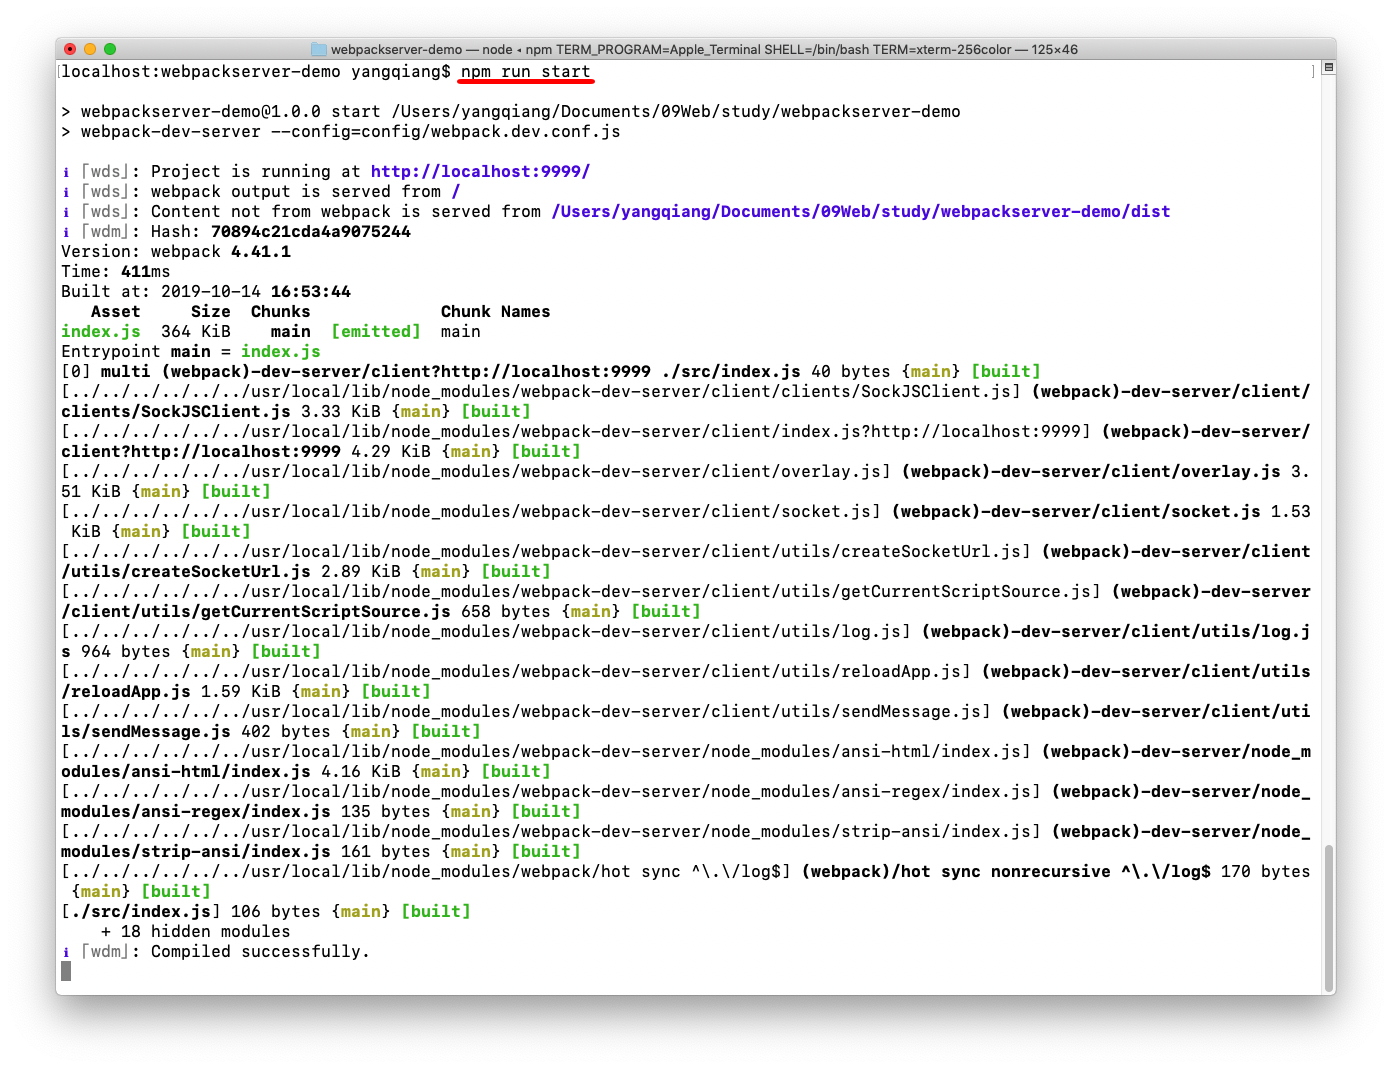

3. 使用浏览器访问
    - url:`http://127.0.0.1:9999`

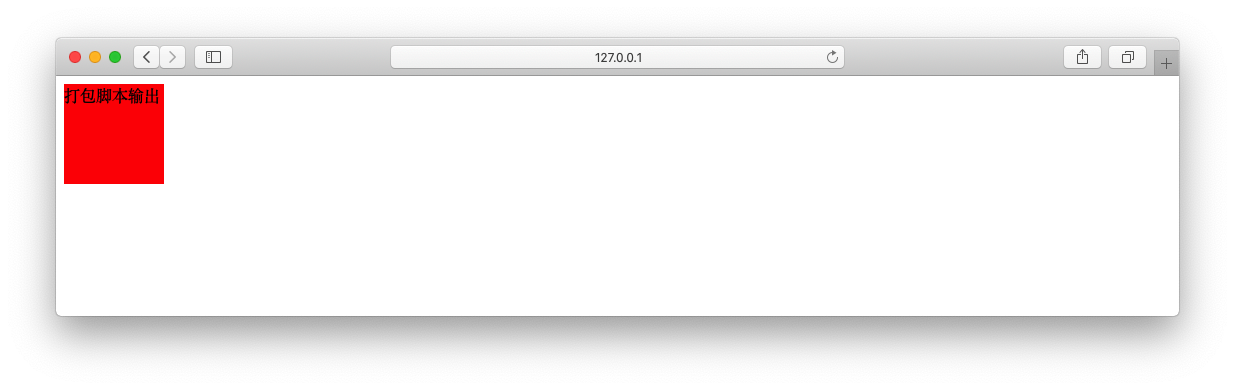

- 说明：
    - 上述build指令，不需要额外操作，我们这儿操作仅仅是演示其工作过程。因为webpack-dev-server是自动完成打包工作，部署的时候可以打包部署。

# 说明

- 实际上还需要进一步明白如下内容，为了早点使用Vue，这里暂时不讲，在后面Vue中使用到的再详细解析：
    - 模块依赖；
    - 各种插件的使用；
    - 各种模块的使用；
    - 更加详细的服务器配置与打包的entry与output配置。

- webpack与webpack-cli的关系
    - 通过webpack-cli把webpack的命令行的很多参数转换为js脚本的配置`webpack.dev.conf.js`
    - 在webpack4.0后号称叫零配置，实际就是指的某些配置采用默认配置，比如entry，output都采用了默认配置，可以不用配置，单是必须按照默认配置命名js的入口文件与目录。

- 实际上，饿了么还研发了cooking模块，提供更加简洁的webpack配置。
    - 后面再用吧，毕竟不是核心内容。

----